# 1D Simulation of Probability density with boundary


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/86/m147b4k17lddvs_xsw0mj2zw0000gn/T/ipykernel_49971/4045841897.py:18: RuntimeWarning: divide by zero encountered in divide
  truncated_gaussian_kde_pdf = np.where(area_values > 0, gaussian_kde_pdf / area_values, 0.0)


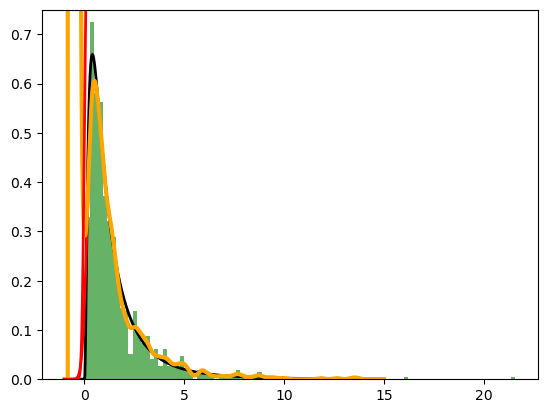

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

loc = 0
scale = 1
shape = 0.954

log_norm_gen = stats.lognorm(loc=loc, scale=scale, s=shape)
data = log_norm_gen.rvs(size=1000)
x = np.linspace(-1, 15, 2000)
pdf = log_norm_gen.pdf(x)

bandwidth = 0.1
gaussian_kde_pdf = stats.gaussian_kde(data, bw_method=bandwidth).pdf(x)
area_values = stats.norm.cdf(np.inf, x, bandwidth) - stats.norm.cdf(0.0, x, bandwidth)

truncated_gaussian_kde_pdf = np.where(area_values > 0, gaussian_kde_pdf / area_values, 0.0)


plt.hist(data, bins=100, density=True, color="green", alpha=0.6)
plt.plot(x, pdf, color="black", linewidth=2)
plt.plot(x, gaussian_kde_pdf, color="red", linewidth=2)
plt.plot(x, truncated_gaussian_kde_pdf, linewidth=3, color="orange")
plt.ylim(0, 0.75)
plt.plot(x, area_values, color="red", linewidth=2)

In [2]:
truncated_gaussian_kde_pdf[450:]

array([1.04760765e-01, 1.04499360e-01, 1.04216226e-01, ...,
       6.38513540e-12, 8.31357815e-12, 1.08100460e-11])